In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("data/archive-2/Child 1 Genome.csv",low_memory=False)
df1 = pd.read_csv("data/archive-2/Child 2 Genome.csv",low_memory=False)
df2 = pd.read_csv("data/archive-2/Child 3 Genome.csv",low_memory=False)

df3 = pd.read_csv("data/archive-2/Father Genome.csv",low_memory=False)
df4 = pd.read_csv("data/archive-2/Mother Genome.csv",low_memory=False)

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [7]:
# Crear diccionario con todos los genomas
genomes = {
    'Child 1': df,
    'Child 2': df1,
    'Child 3': df2,
    'Father': df3,
    'Mother': df4
}

# Información básica de cada dataset
for name, dataset in genomes.items():
    print(f"\n{'='*60}")
    print(f"DATASET: {name}")
    print(f"{'='*60}")
    print(f"Dimensiones: {dataset.shape[0]} filas x {dataset.shape[1]} columnas")
    print(f"\nValores nulos por columna:")
    print(dataset.isnull().sum())


DATASET: Child 1
Dimensiones: 601802 filas x 4 columnas

Valores nulos por columna:
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64

DATASET: Child 2
Dimensiones: 631983 filas x 4 columnas

Valores nulos por columna:
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64

DATASET: Child 3
Dimensiones: 631983 filas x 4 columnas

Valores nulos por columna:
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64

DATASET: Father
Dimensiones: 601802 filas x 4 columnas

Valores nulos por columna:
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64

DATASET: Mother
Dimensiones: 601802 filas x 4 columnas

Valores nulos por columna:
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64


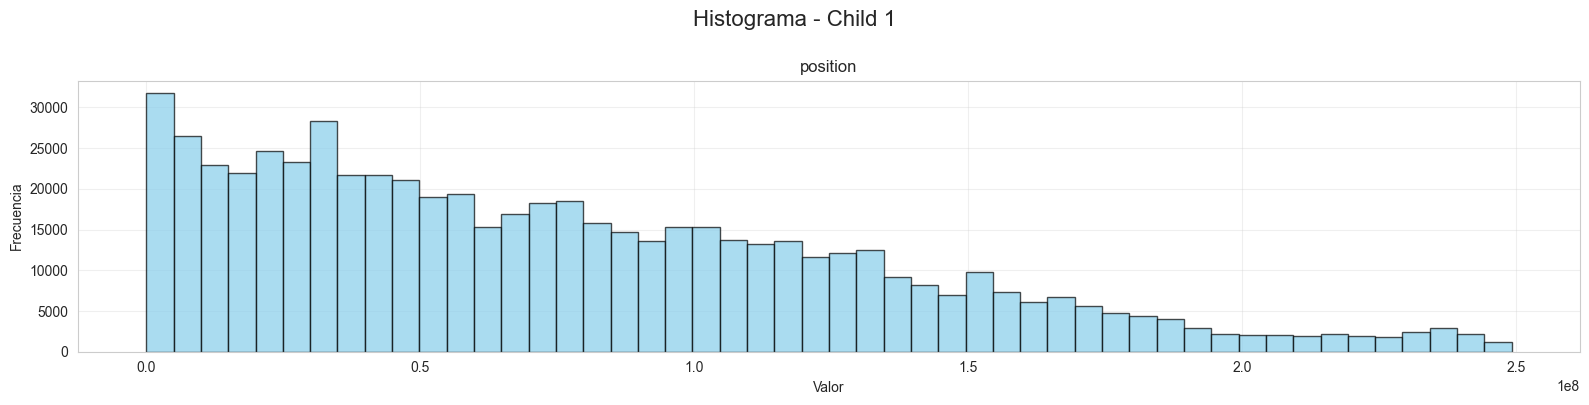

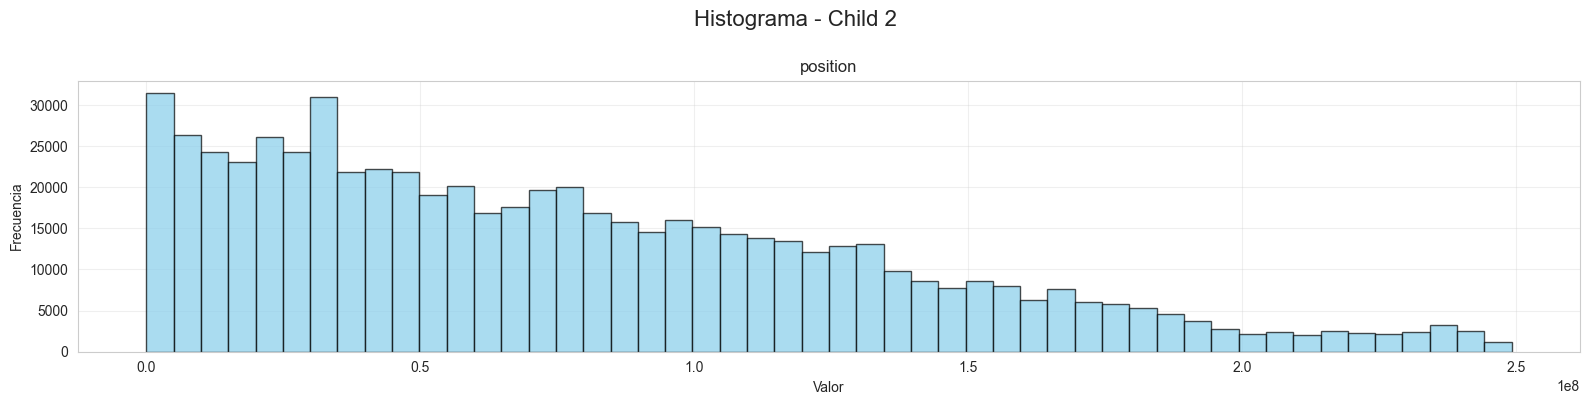

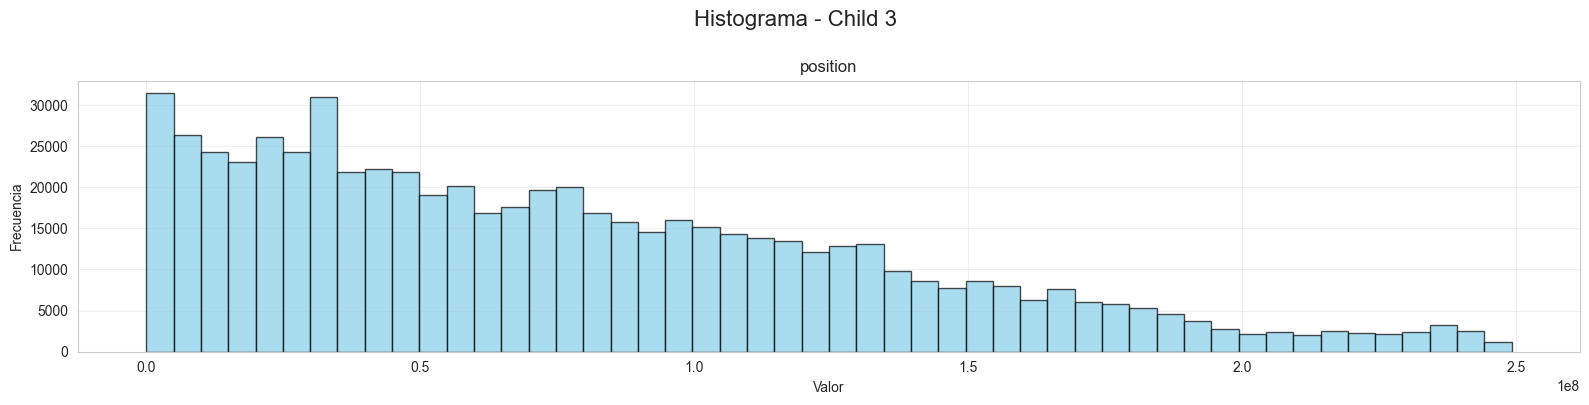

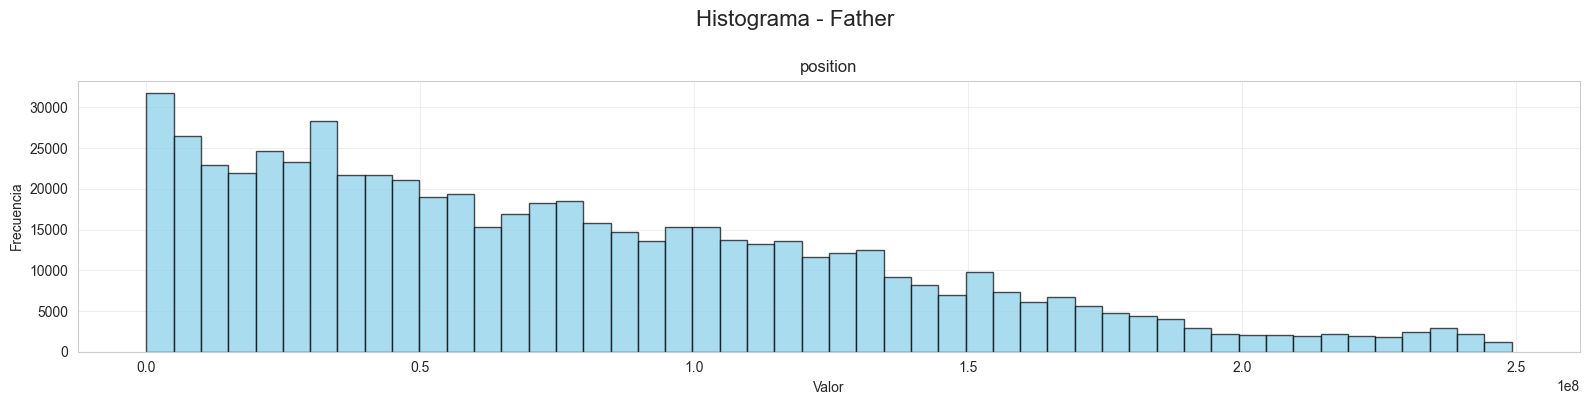

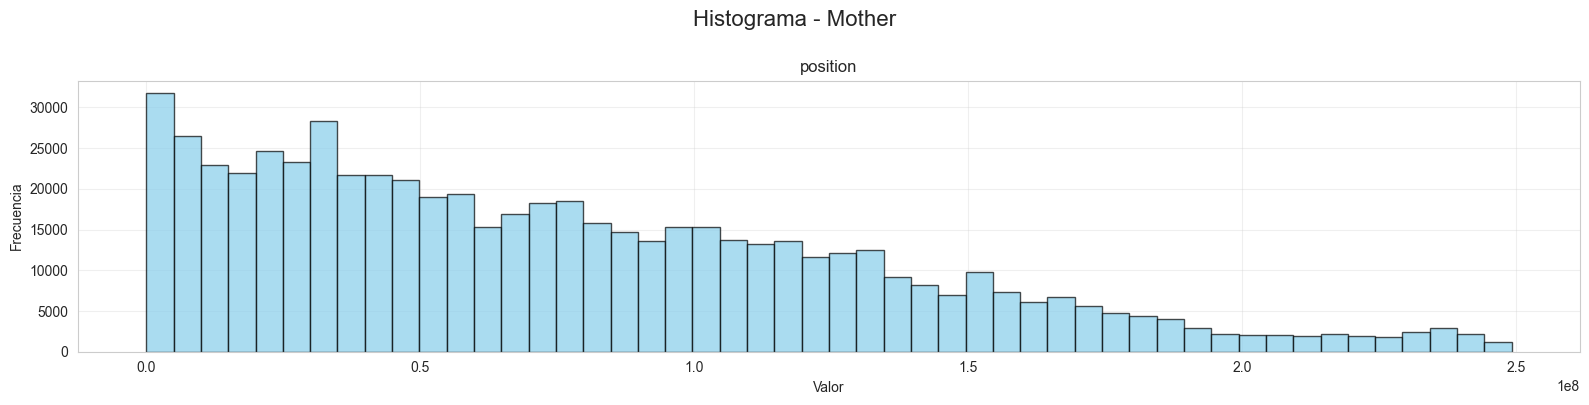

In [ ]:
# Histogramas para variables numéricas de todos los genomas
for name, dataset in genomes.items():
    numeric_cols = dataset.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 0:
        n_cols = min(len(numeric_cols), 4)
        n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
        fig.suptitle(f'Histograma - {name}', fontsize=16, y=1.00)
        
        if n_rows * n_cols > 1:
            axes = axes.flatten()
        else:
            axes = [axes]
        
        for idx, col in enumerate(numeric_cols):
            if idx < len(axes):
                # Histograma con curva de densidad
                axes[idx].hist(dataset[col].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
                axes[idx].set_title(f'{col}', fontsize=12)
                axes[idx].set_xlabel('Valor')
                axes[idx].set_ylabel('Frecuencia')
                axes[idx].grid(alpha=0.3)
        
        # Ocultar ejes vacíos
        for idx in range(len(numeric_cols), len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()

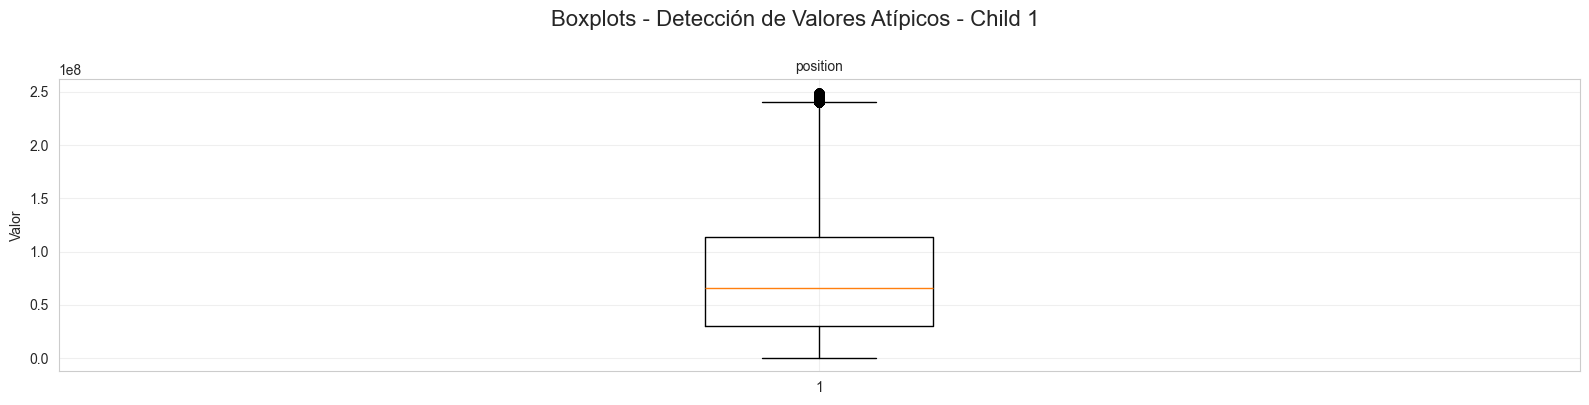

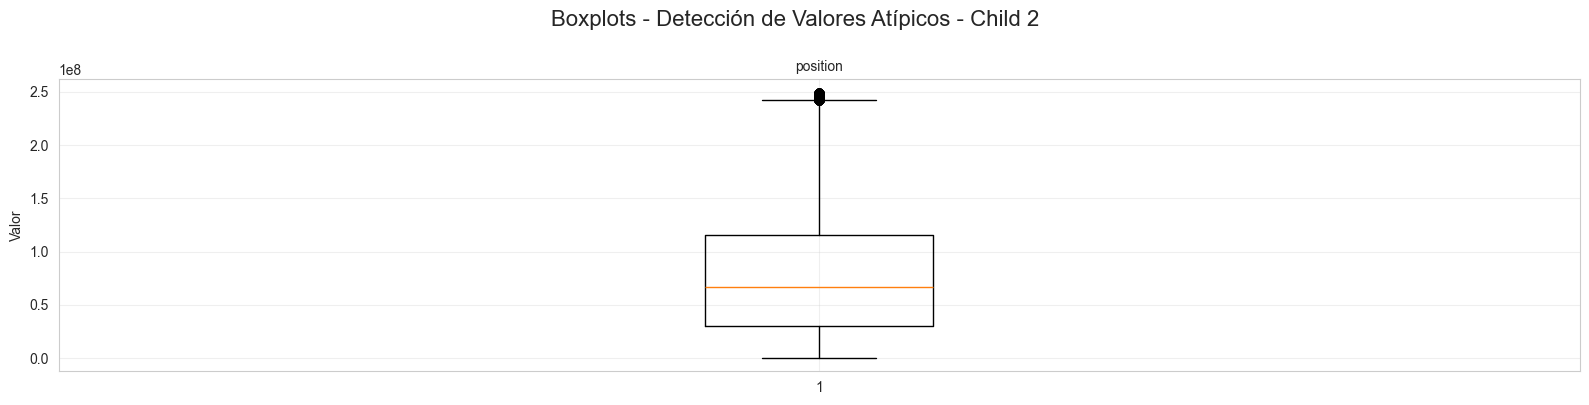

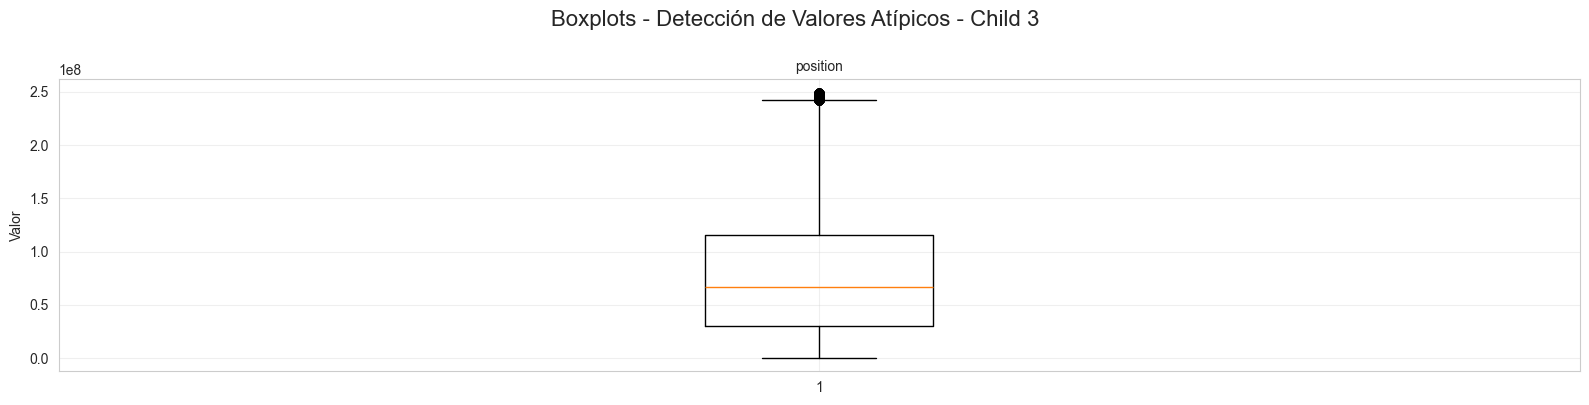

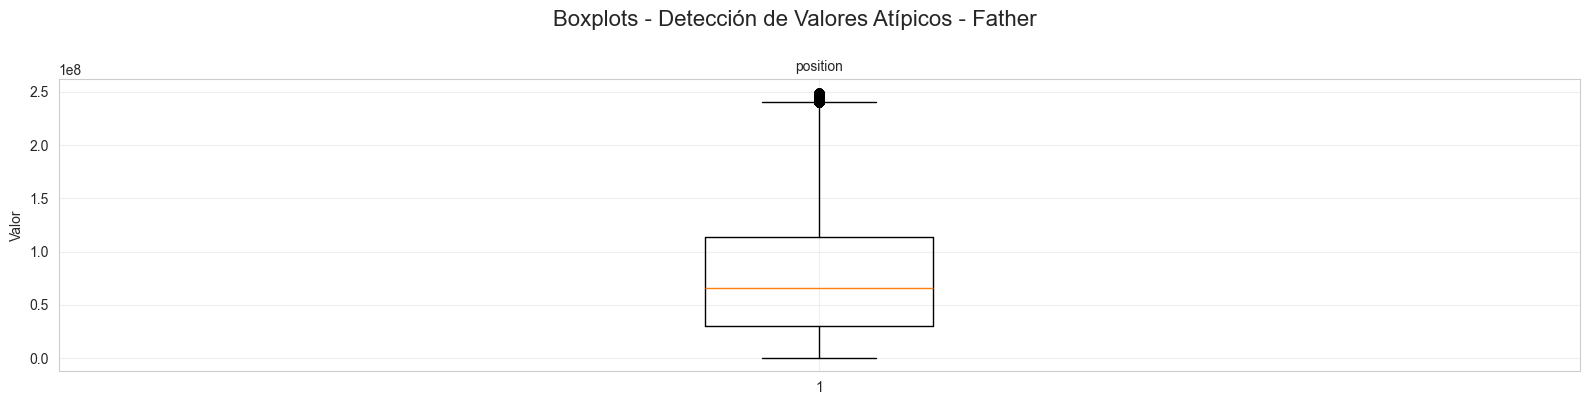

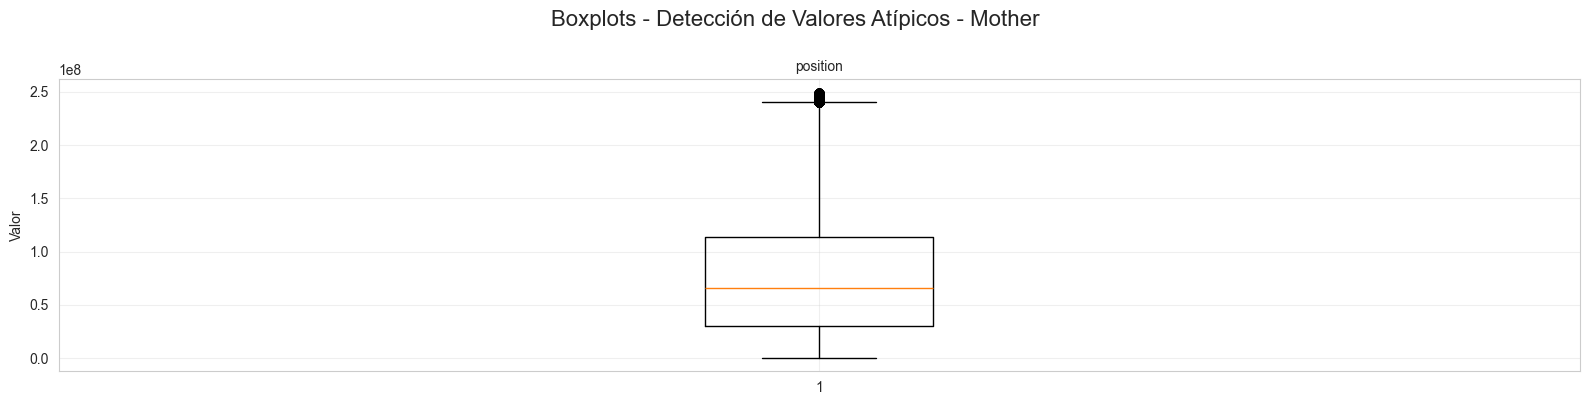

In [ ]:

for name, dataset in genomes.items():
    numeric_cols = dataset.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 0:
        n_cols = min(len(numeric_cols), 4)
        n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
        fig.suptitle(f'Boxplots - Detección de Valores Atípicos - {name}', fontsize=16, y=1.00)
        
        if n_rows * n_cols > 1:
            axes = axes.flatten()
        else:
            axes = [axes]
        
        for idx, col in enumerate(numeric_cols):
            if idx < len(axes):
                data = dataset[col].dropna()
                axes[idx].boxplot(data, vert=True)
                axes[idx].set_title(f'{col}', fontsize=10)
                axes[idx].set_ylabel('Valor')
                axes[idx].grid(alpha=0.3)
        
        # Ocultar ejes vacíos
        for idx in range(len(numeric_cols), len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()

<Axes: title={'center': 'child 1'}, xlabel='genotype'>

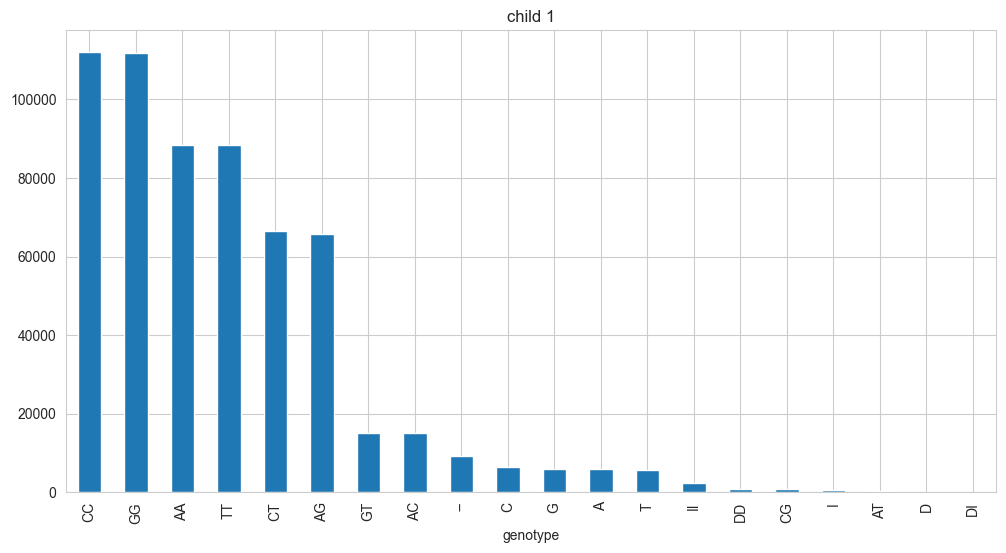

In [10]:
df['genotype'].value_counts().plot(kind='bar',title='child 1')


<Axes: title={'center': 'child 2'}, xlabel='genotype'>

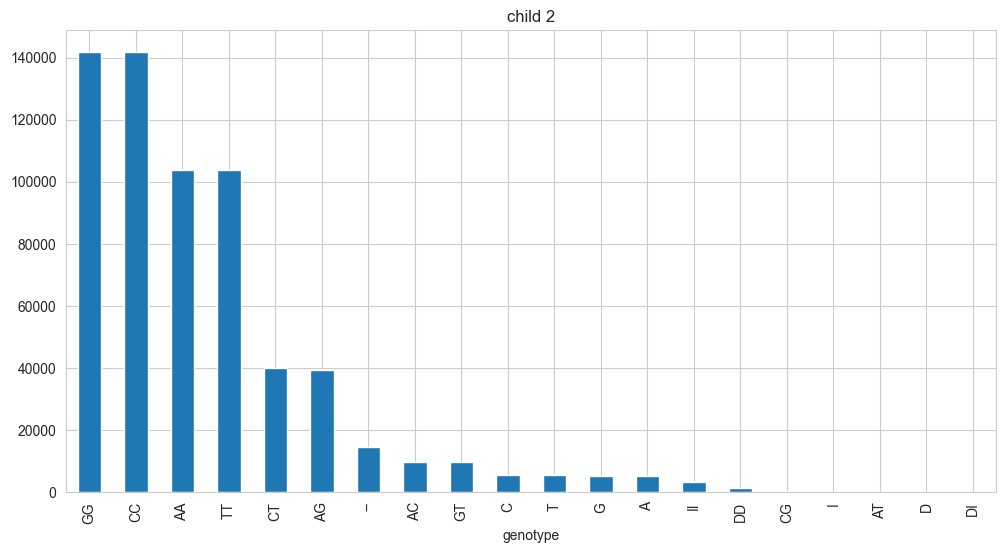

In [11]:
df1['genotype'].value_counts().plot(kind='bar',title='child 2')


<Axes: title={'center': 'child 3'}, xlabel='genotype'>

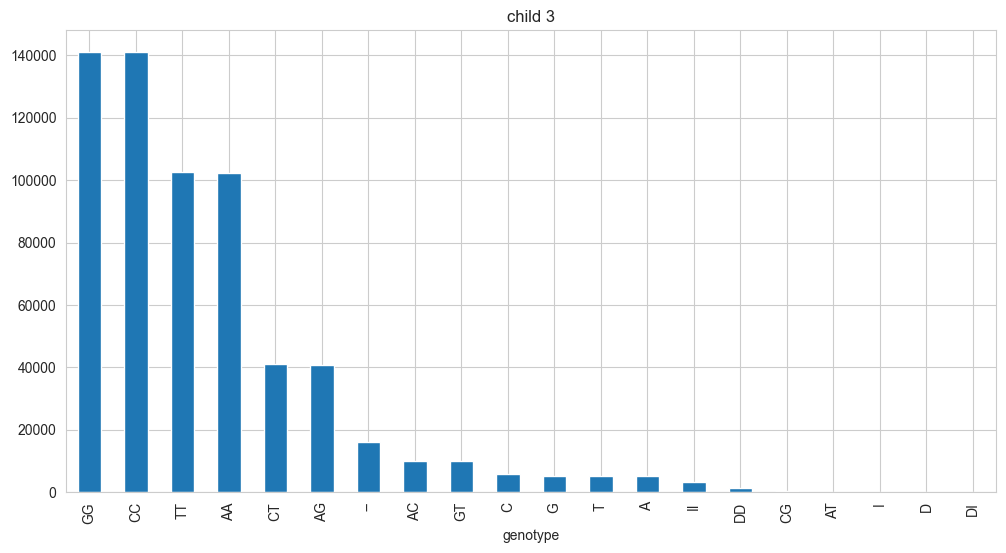

In [12]:
df2['genotype'].value_counts().plot(kind='bar',title='child 3')

<Axes: title={'center': 'father'}, xlabel='genotype'>

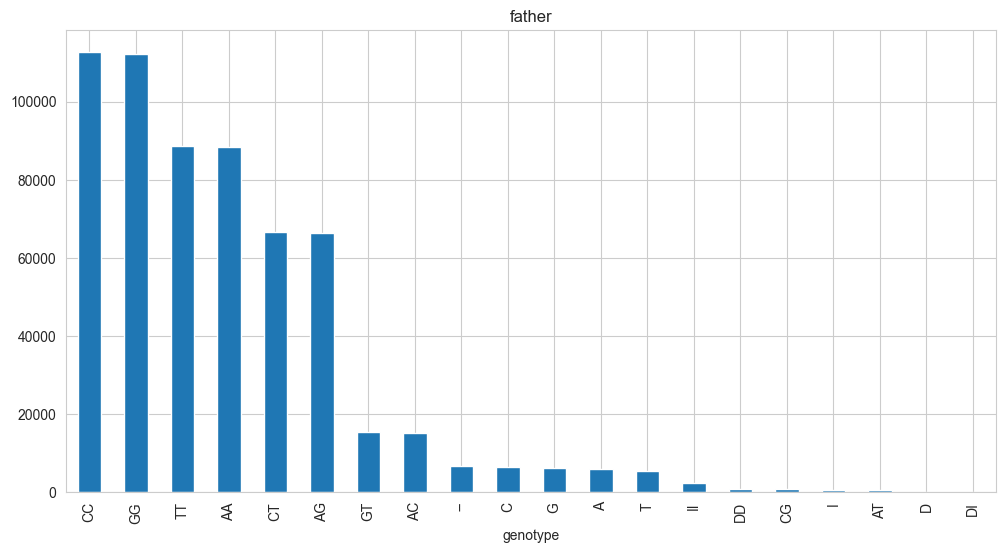

In [13]:
df3['genotype'].value_counts().plot(kind='bar',title='father')

<Axes: title={'center': 'mother'}, xlabel='genotype'>

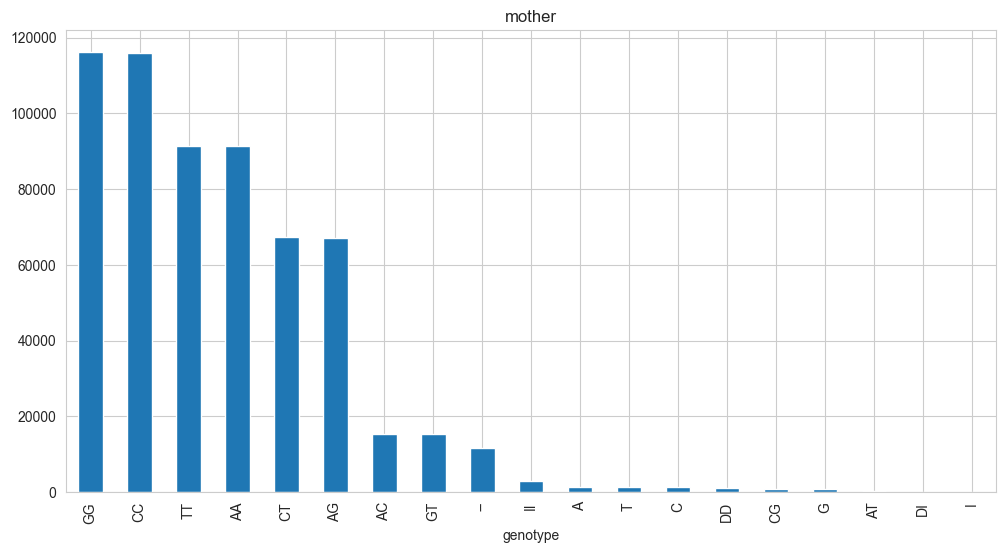

In [14]:
df4['genotype'].value_counts().plot(kind='bar',title='mother')